In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression # Algoritmo de Regressão Linear

# definir o estilo do seaborn para os plots
sns.set_style()
df_dados = pd.read_csv("https://raw.githubusercontent.com/VitorVianna/MVPPUC_AI/main/Data/dados_credito.csv", sep=';', encoding='latin-1')


In [ ]:
df_dados.head()

,CODIGO_CLIENTE,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
0,1,SP,19,Superior Cursando,Solteiro,0,Não,0,0,Não,0,8,Sim,1800,0,0,12
1,2,MG,23,Superior Completo,Solteiro,1,Não,0,0,Não,0,9,Não,4800,1,50000,18
2,3,SC,25,Segundo Grau Completo,Casado,0,Sim,1,220000,Não,0,18,Sim,2200,2,30000,23
3,4,PR,27,Superior Cursando,Casado,1,Sim,0,0,Não,0,22,Não,3900,0,0,29
4,5,RJ,28,Superior Completo,Divorciado,2,Não,1,370000,Não,0,30,Sim,NaN,1,35000,34


In [ ]:
#Comando utilizado para verificar informações sobre os dados(Tipo de variáveis, Variáveis, Quantidade de registros, etc)

# A variavel CODIGO_CLIENTE poderá ser excluída
# As variaveis UF, ESCOLARIDADE, CASA_PROPRIA, OUTRA_RENDA, TRABALHANDO_ATUALMENTE e ESTADO_CIVIL --> OneHotEncoding
# A variavel ULTIMO_SALARIO está como STRING e precisa ser NUMERICA

df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CODIGO_CLIENTE              10476 non-null  int64 
 1   UF                          10476 non-null  object
 2   IDADE                       10476 non-null  int64 
 3   ESCOLARIDADE                10476 non-null  object
 4   ESTADO_CIVIL                10476 non-null  object
 5   QT_FILHOS                   10476 non-null  int64 
 6   CASA_PROPRIA                10476 non-null  object
 7   QT_IMOVEIS                  10476 non-null  int64 
 8   VL_IMOVEIS                  10476 non-null  int64 
 9   OUTRA_RENDA                 10476 non-null  object
 10  OUTRA_RENDA_VALOR           10476 non-null  int64 
 11  TEMPO_ULTIMO_EMPREGO_MESES  10476 non-null  int64 
 12  TRABALHANDO_ATUALMENTE      10476 non-null  object
 13  ULTIMO_SALARIO              10474 non-null  ob

In [ ]:
# Vamos excluir a variavel CODIGO_CLIENTE
df_dados.drop('CODIGO_CLIENTE', axis=1, inplace=True)

In [ ]:
# Dessa forma podemos agrupar os valores e identificar se há algum valor discrepante.
# Observe que há um valor que foi inserido como "SEM DADOS"
df_dados.groupby(['ULTIMO_SALARIO']).size()

,0
ULTIMO_SALARIO,
11500,790
13000,522
15000,522
17500,522
1800,846
18300,522
2200,792
22000,468
3100,792


In [ ]:
# Aqui poderíamos resolver de duas formas.

# A primeira forma seria excluir todo o registro, mas estariamos perdendo dados.
#df_dados.drop(df_dados.loc[df_dados['VALOR']=='SEM VALOR'].index, inplace=True)


# A segunda forma seria verificar o valor médio ou da mediana deste modelo e substituir a palavra SEM VALOR para um valor médio.
df_dados.loc[df_dados['ULTIMO_SALARIO'] == 'SEM DADOS']

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
10459,RJ,45,Superior Cursando,Solteiro,1,Sim,1,185000,Sim,3000,19,Sim,SEM DADOS,0,0,45


In [ ]:
# Agora substituimos a palavra SEM VALOR por um valor NULO
df_dados.replace('SEM DADOS',np.nan, inplace = True)

In [ ]:
# Em seguida convertemos o campo em float
df_dados['ULTIMO_SALARIO'] = df_dados['ULTIMO_SALARIO'].astype(np.float64)

In [ ]:
# Comando utilizado para avaliar se alguma variável possui valor nulo ou chamado de valores missing ou NAN (Not Available)
# A variavel ULTIMO_SALARIO possui valores NULOS e precisaremos trata-los
df_dados.isnull().sum()

,0
UF,0
IDADE,0
ESCOLARIDADE,0
ESTADO_CIVIL,0
QT_FILHOS,0
CASA_PROPRIA,0
QT_IMOVEIS,0
VL_IMOVEIS,0
OUTRA_RENDA,0
OUTRA_RENDA_VALOR,0


In [ ]:
# Aqui atualizamos o valor conforme a mediana daquele modelo
df_dados['ULTIMO_SALARIO'] = df_dados['ULTIMO_SALARIO'].fillna((df_dados['ULTIMO_SALARIO'].median()))

In [ ]:
# Vamos confirmar se não restaram valores nulos
df_dados.isnull().sum()

,0
UF,0
IDADE,0
ESCOLARIDADE,0
ESTADO_CIVIL,0
QT_FILHOS,0
CASA_PROPRIA,0
QT_IMOVEIS,0
VL_IMOVEIS,0
OUTRA_RENDA,0
OUTRA_RENDA_VALOR,0


In [ ]:
# Agora iremos avaliar os outliers das colunas que são númericas
# OUTLIERS são valores discrepantes que estão bem acima ou bem abaixo dos outros valores

# Vamos carregar em uma lista as variaveis que são do tipo INT64 E FLOAT64
variaveis_numericas = []
for i in df_dados.columns[0:16].tolist():
        if df_dados.dtypes[i] == 'int64' or df_dados.dtypes[i] == 'float64':
            print(i, ':' , df_dados.dtypes[i])
            variaveis_numericas.append(i)

IDADE : int64
QT_FILHOS : int64
QT_IMOVEIS : int64
VL_IMOVEIS : int64
OUTRA_RENDA_VALOR : int64
TEMPO_ULTIMO_EMPREGO_MESES : int64
ULTIMO_SALARIO : float64
QT_CARROS : int64
VALOR_TABELA_CARROS : int64
SCORE : int64


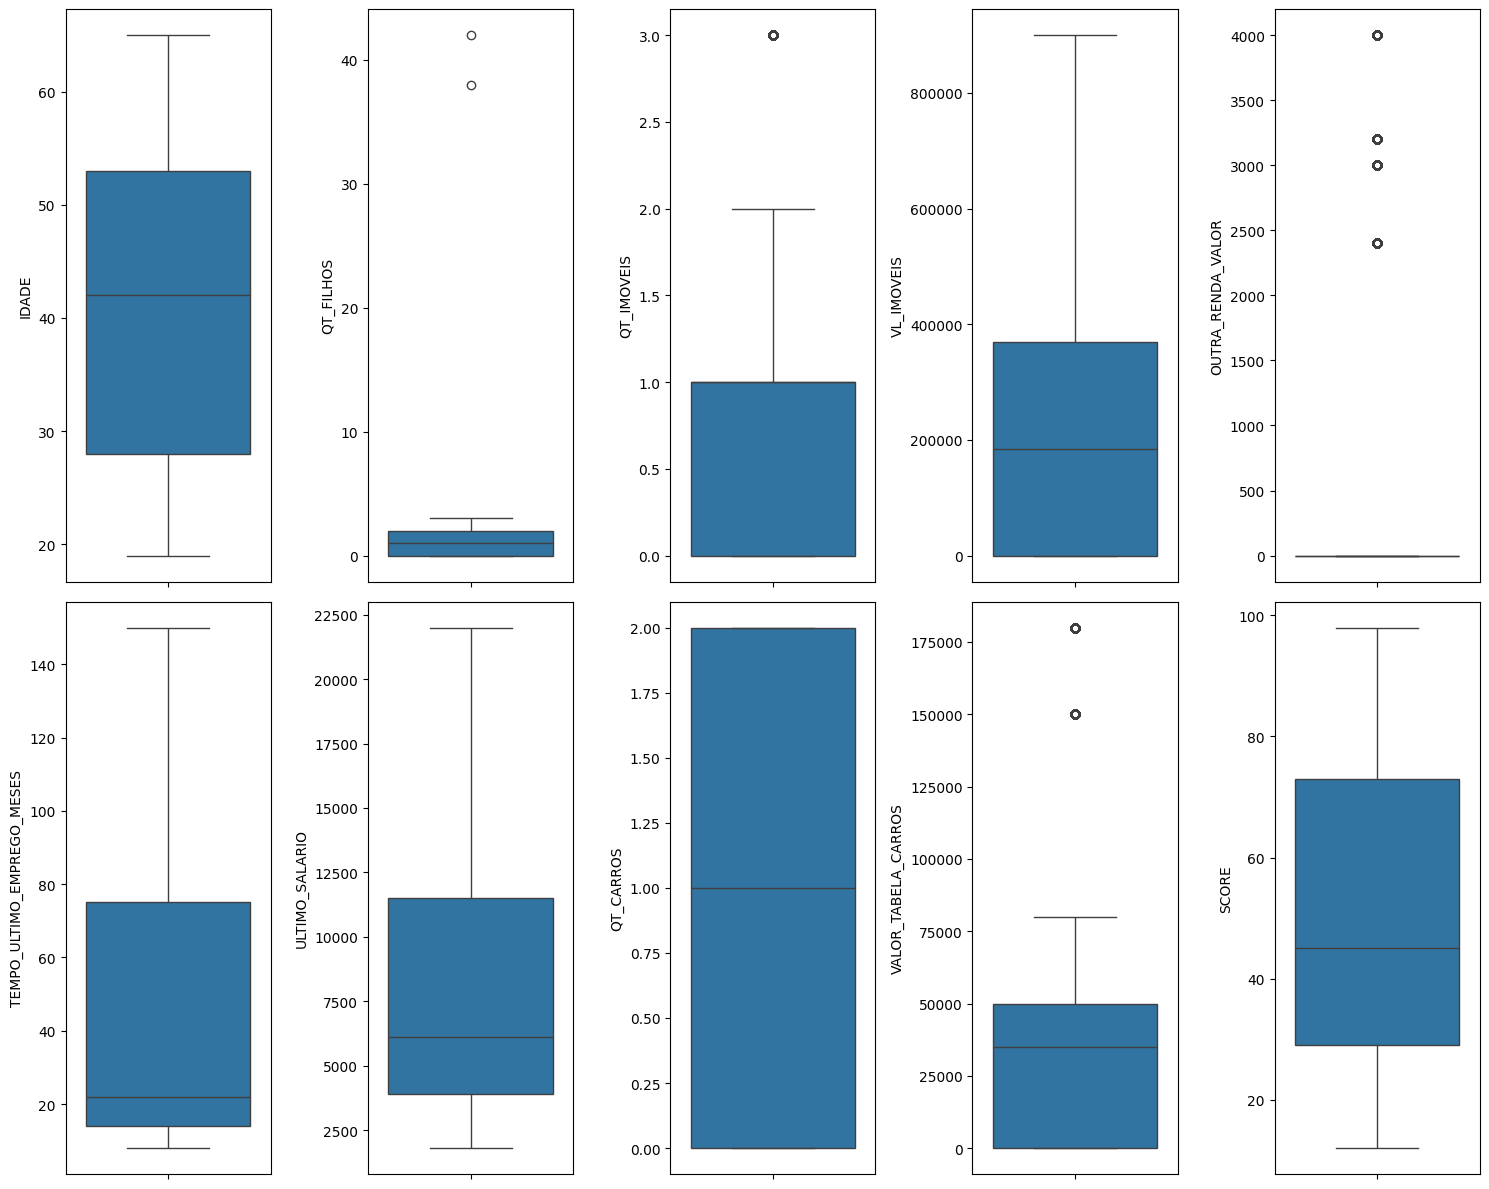

In [ ]:
# Aqui definimos o tamanho da tela para exibição dos gráficos
plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True

# Aqui definimos em quantas linhas e colunas queremos exibir os gráficos
f, axes = plt.subplots(2, 5) #2 linhas e 5 colunas

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.boxplot(data = df_dados, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 5:
        linha += 1
        coluna = 0

plt.show()

In [ ]:
# Agora já sabemos que temos possíveis OUTLIERS nas variáveis QT_FILHOS, QT_IMOVEIS, VALOR_TABELA_CARROS e OUTRA_RENDA_VALOR
# Vamos olhar quais são esses outliers para avaliar como iremos trata-los.

# Vamos listar a quantidade de filhos superiores a 4
# Como temos somente 2 registros que realmente são outliers então iremos exclui-los
df_dados.loc[df_dados['QT_FILHOS'] > 4]

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
27,SP,48,Superior Completo,Divorciado,38,Sim,2,600000,Não,0,15,Sim,15000.0,1,70000,67
10455,SP,45,Segundo Grau Completo,Casado,42,Sim,1,220000,Não,0,18,Sim,2200.0,2,30000,23


In [ ]:
# Não precisamos alterar nada
df_dados.groupby(['OUTRA_RENDA_VALOR']).size()

df_dados.groupby(['VALOR_TABELA_CARROS']).size()

df_dados.groupby(['QT_IMOVEIS']).size()

,0
QT_IMOVEIS,
0,4680
1,3761
2,989
3,1044


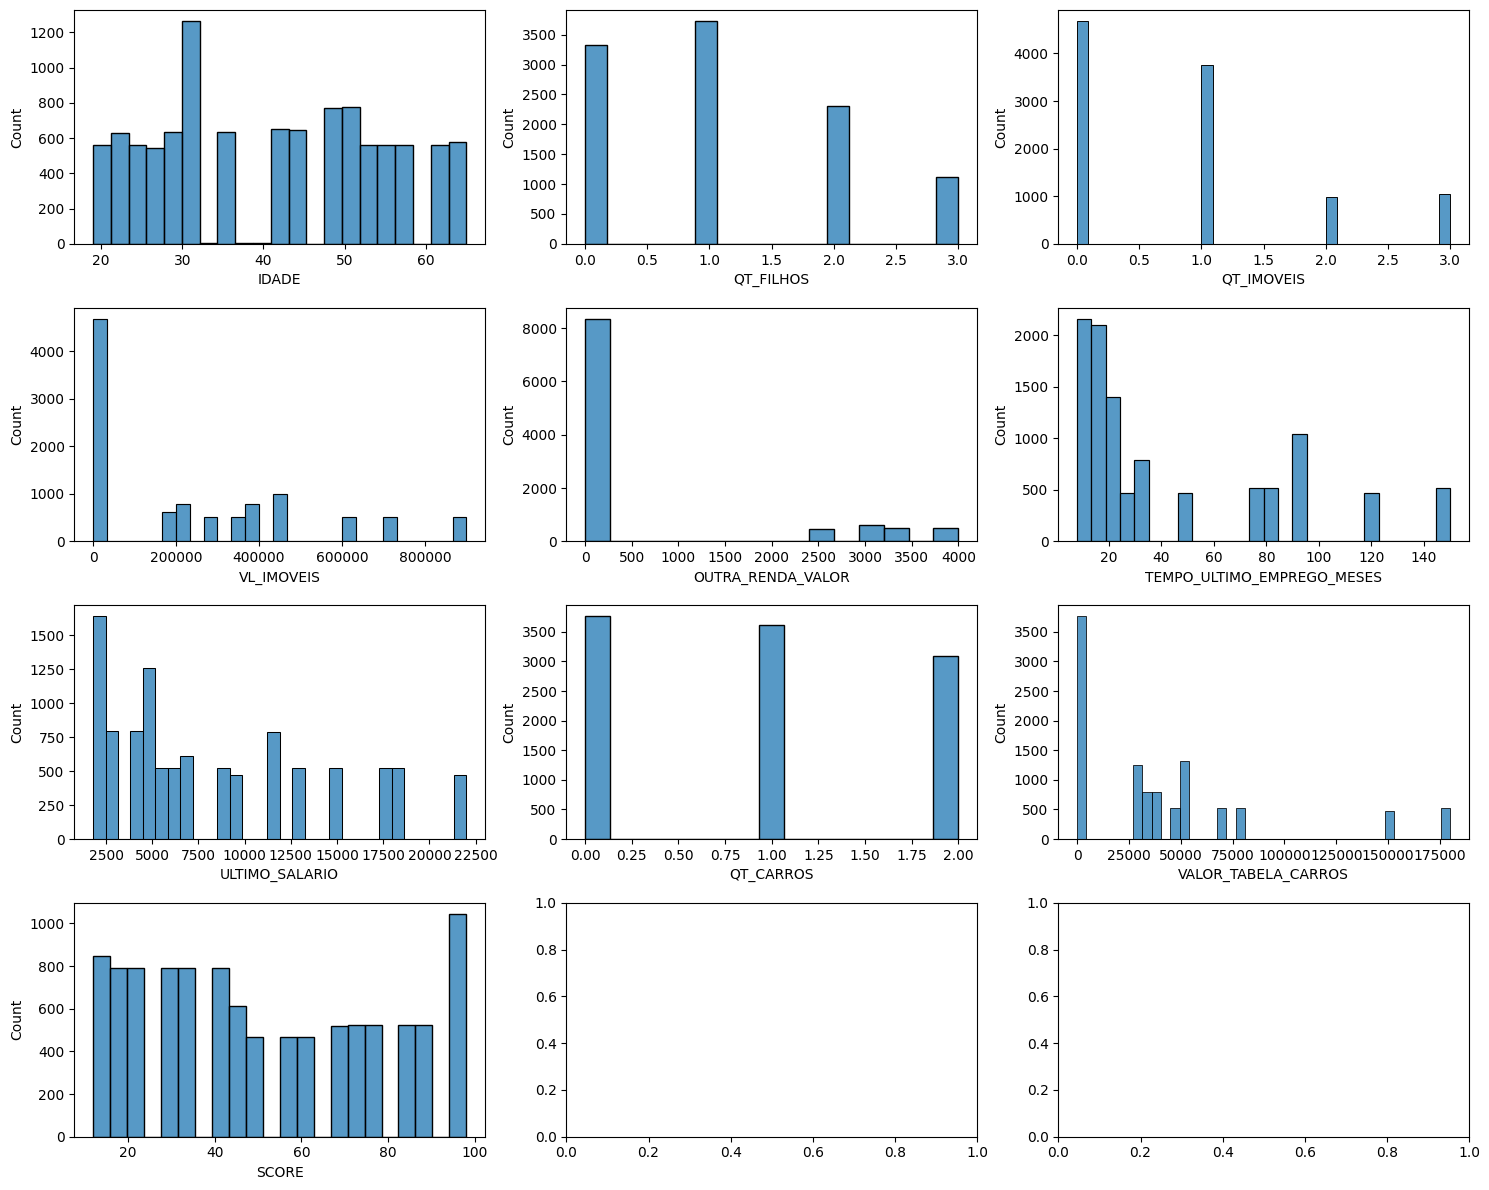

In [ ]:
# Vamos gerar um gráfico de histograma para avaliar a distribuição dos dados
# Podemos observar que neste caso os dados estão bem dispersos

# Aqui definimos o tamanho da tela para exibição dos gráficos
plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True

# Aqui definimos em quantas linhas e colunas queremos exibir os gráficos
f, axes = plt.subplots(4, 3) #4 linhas e 3 colunas

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.histplot(data = df_dados, x=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0

plt.show()

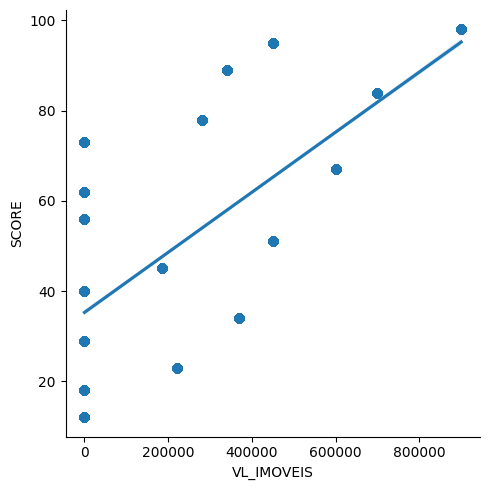

In [ ]:

# Vamos observar um grafico de dispersão para avaliar a correlação de algumas variaveis
sns.lmplot(x = "VL_IMOVEIS", y = "SCORE", data = df_dados);

In [ ]:
# Vamos fazer uma engenharia de atributos no campo de IDADE e criar um novo campo de Faixa Etaria
print('Menor Idade: ', df_dados['IDADE'].min())
print('Maior Idade: ', df_dados['IDADE'].max())

# Engenharia de Atributos - Iremos criar uma nova variável
idade_bins = [0, 30, 40, 50, 60]
idade_categoria = ["Até 30", "31 a 40", "41 a 50", "Maior que 50"]

df_dados["FAIXA_ETARIA"] = pd.cut(df_dados["IDADE"], idade_bins, labels=idade_categoria)

df_dados["FAIXA_ETARIA"].value_counts()





Menor Idade:  19
Maior Idade:  65


,count
FAIXA_ETARIA,
Até 30,3552
Maior que 50,2448
41 a 50,2070
31 a 40,1270


In [ ]:
variaveis_categoricas = []
for i in df_dados.columns[0:48].tolist():
        if df_dados.dtypes[i] == 'object' or df_dados.dtypes[i] == 'category':
            print(i, ':' , df_dados.dtypes[i])
            variaveis_categoricas.append(i)



UF : object
ESCOLARIDADE : object
ESTADO_CIVIL : object
CASA_PROPRIA : object
OUTRA_RENDA : object
TRABALHANDO_ATUALMENTE : object
FAIXA_ETARIA : category


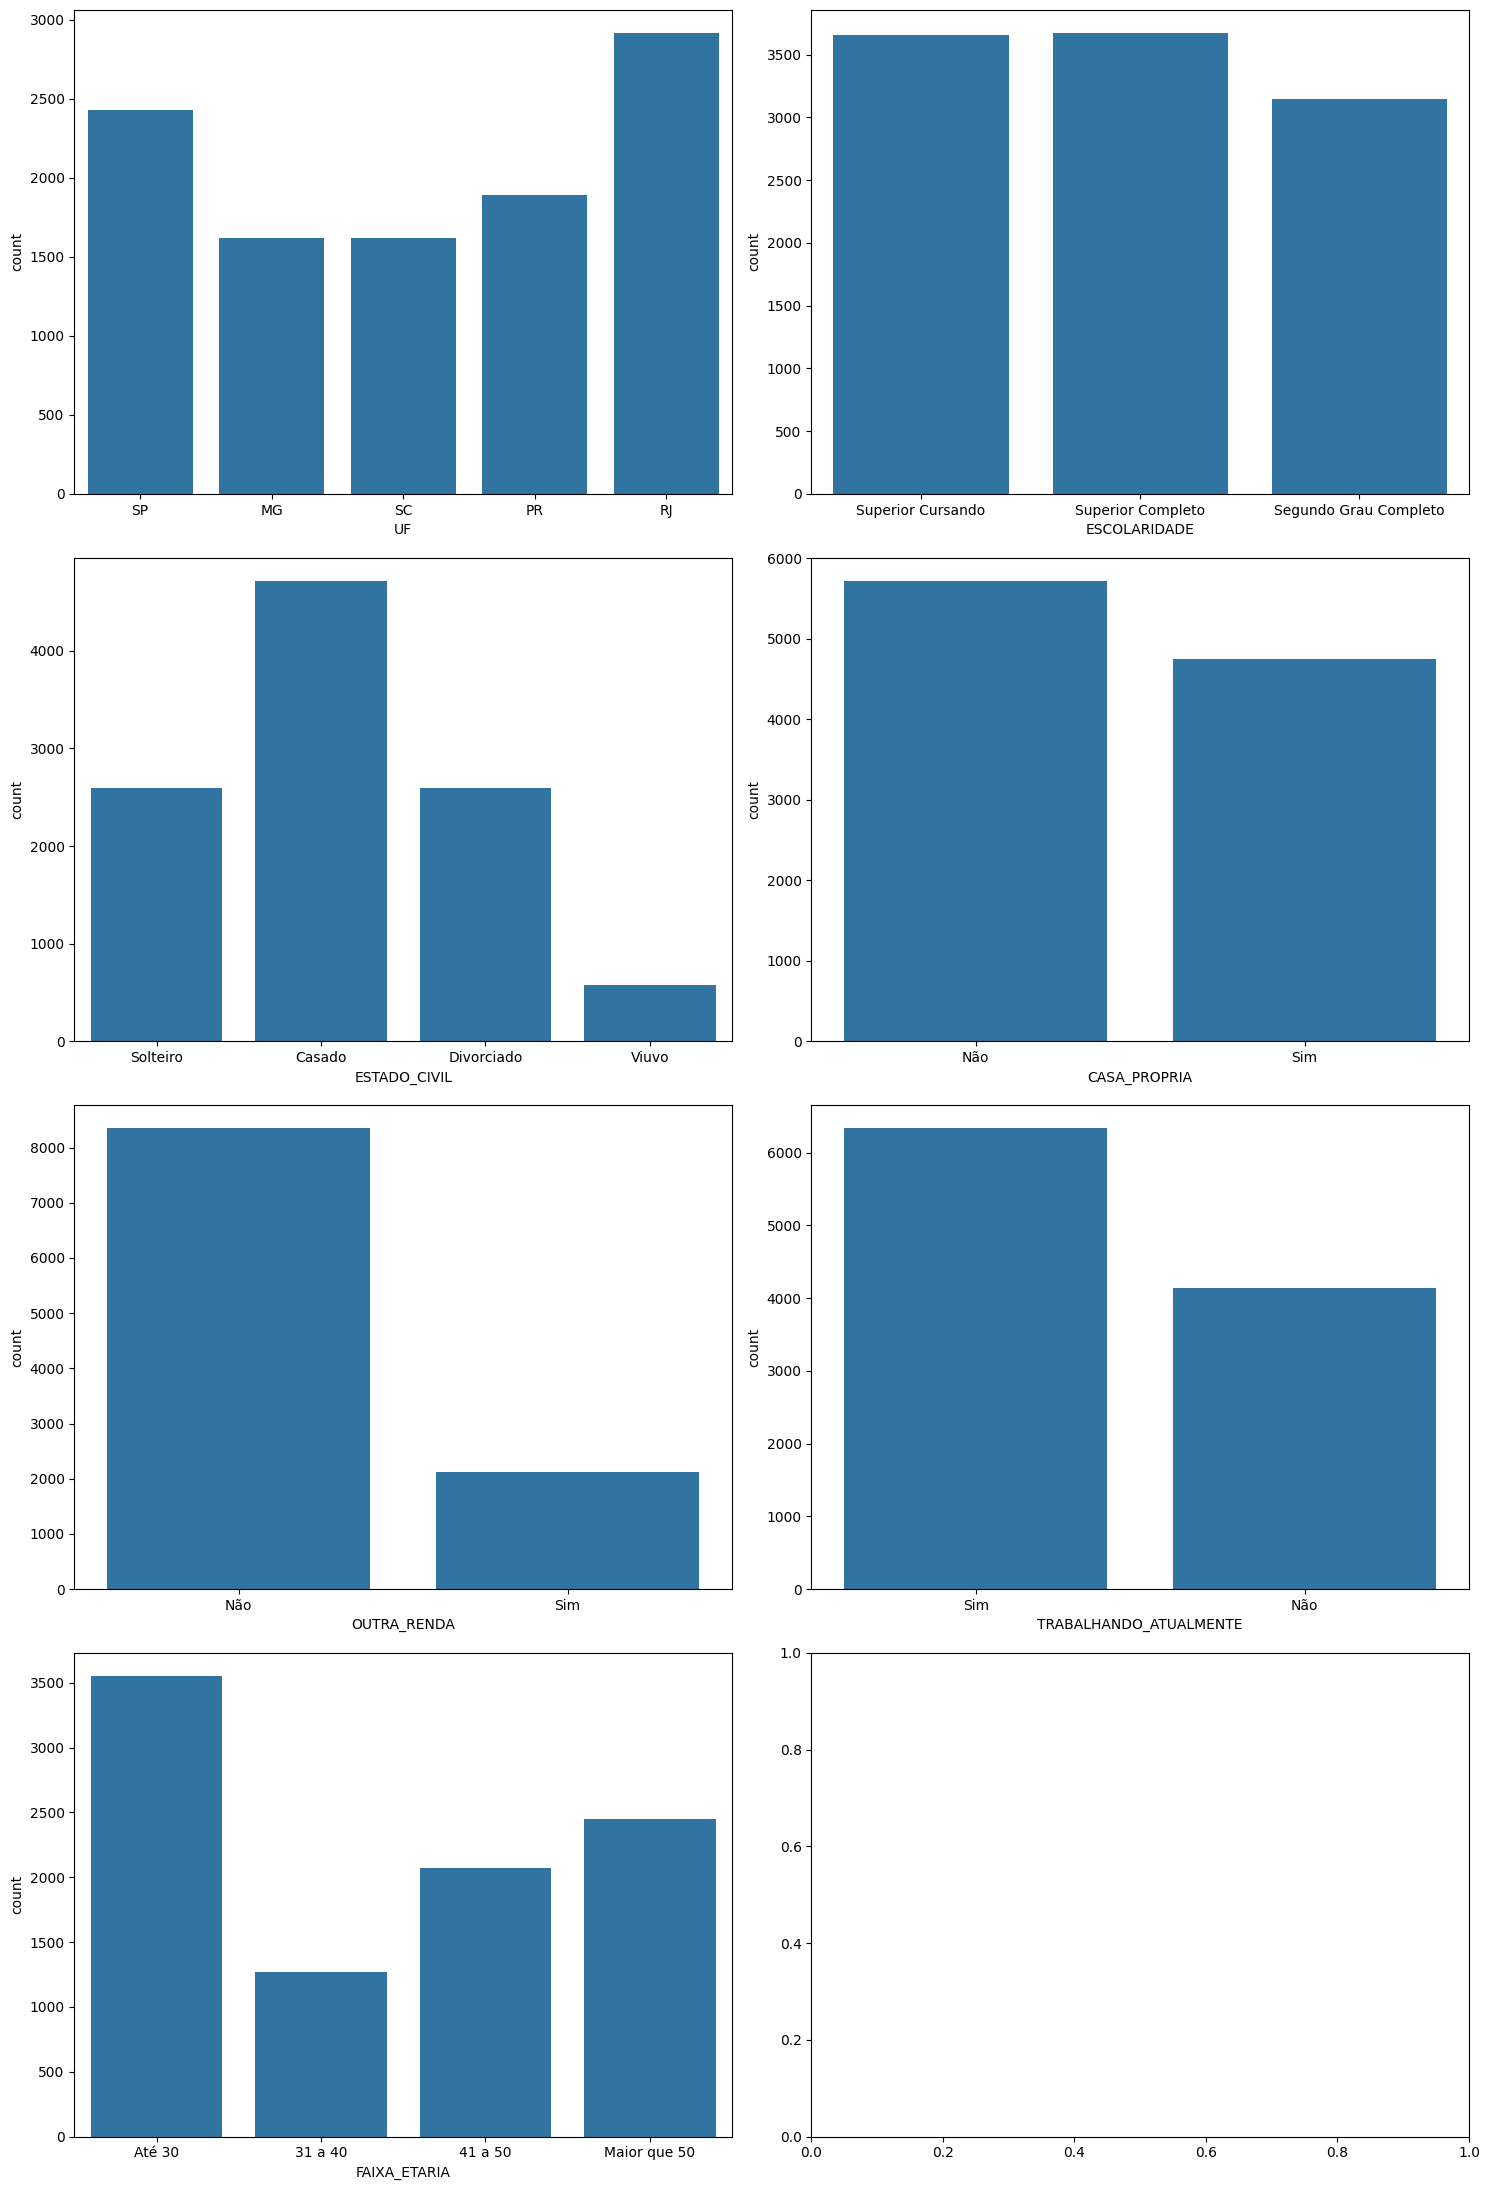

In [ ]:
# Com este comando iremos exibir todos gráficos de todas colunas de uma vez só para facilitar nossa analise.

# Aqui definimos o tamanho da tela para exibição dos gráficos
plt.rcParams["figure.figsize"] = [15.00, 22.00]
plt.rcParams["figure.autolayout"] = True

# Aqui definimos em quantas linhas e colunas queremos exibir os gráficos
f, axes = plt.subplots(4, 2) #3 linhas e 2 colunas

linha = 0
coluna = 0

for i in variaveis_categoricas:
    sns.countplot(data = df_dados, x=i, ax=axes[linha][coluna])

    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0

plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Cria o encoder
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
df_dados['FAIXA_ETARIA'] = lb.fit_transform(df_dados['FAIXA_ETARIA'])
df_dados['OUTRA_RENDA'] = lb.fit_transform(df_dados['OUTRA_RENDA'])
df_dados['TRABALHANDO_ATUALMENTE'] = lb.fit_transform(df_dados['TRABALHANDO_ATUALMENTE'])
df_dados['ESTADO_CIVIL'] = lb.fit_transform(df_dados['ESTADO_CIVIL'])
df_dados['CASA_PROPRIA'] = lb.fit_transform(df_dados['CASA_PROPRIA'])
df_dados['ESCOLARIDADE'] = lb.fit_transform(df_dados['ESCOLARIDADE'])
df_dados['UF'] = lb.fit_transform(df_dados['UF'])

# Remove valores missing eventualmente gerados
df_dados.dropna(inplace = True)

In [ ]:
df_dados.head(50)

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE,FAIXA_ETARIA
0,4,19,2,2,0,0,0,0,0,0,8,1,1800.0,0,0,12,2
1,0,23,1,2,1,0,0,0,0,0,9,0,4800.0,1,50000,18,2
2,3,25,0,0,0,1,1,220000,0,0,18,1,2200.0,2,30000,23,2
3,1,27,2,0,1,1,0,0,0,0,22,0,3900.0,0,0,29,2
4,2,28,1,1,2,0,1,370000,0,0,30,1,6100.0,1,35000,34,2
5,4,30,0,1,0,0,0,0,0,0,14,1,3100.0,2,40000,40,2
6,0,32,2,2,1,1,1,185000,1,3000,19,1,6800.0,0,0,45,0
7,3,35,1,2,1,1,2,450000,1,2400,25,1,22000.0,1,150000,51,0
8,1,42,0,0,0,0,0,0,0,0,48,1,4500.0,2,28000,56,1
9,2,45,2,0,0,0,0,0,0,0,120,0,9800.0,0,0,62,1


In [ ]:
# Agora podemos observar que já temos todas variaveis numericas
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10474 entries, 0 to 10475
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UF                          10474 non-null  int64  
 1   IDADE                       10474 non-null  int64  
 2   ESCOLARIDADE                10474 non-null  int64  
 3   ESTADO_CIVIL                10474 non-null  int64  
 4   QT_FILHOS                   10474 non-null  int64  
 5   CASA_PROPRIA                10474 non-null  int64  
 6   QT_IMOVEIS                  10474 non-null  int64  
 7   VL_IMOVEIS                  10474 non-null  int64  
 8   OUTRA_RENDA                 10474 non-null  int64  
 9   OUTRA_RENDA_VALOR           10474 non-null  int64  
 10  TEMPO_ULTIMO_EMPREGO_MESES  10474 non-null  int64  
 11  TRABALHANDO_ATUALMENTE      10474 non-null  int64  
 12  ULTIMO_SALARIO              10474 non-null  float64
 13  QT_CARROS                   10474 no

In [ ]:
# Separando a variavel alvo
target = df_dados.iloc[:,15:16]

In [ ]:
# Separando as variaveis preditoras

preditoras = df_dados.copy() #Fazendo uma cópia do dataframe

del preditoras['SCORE'] #Excluindo a variavel target, pois já separamos ela na etapa anterior

preditoras.head()#Visualizando as variaveis preditoras

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,FAIXA_ETARIA
0,4,19,2,2,0,0,0,0,0,0,8,1,1800.0,0,0,2
1,0,23,1,2,1,0,0,0,0,0,9,0,4800.0,1,50000,2
2,3,25,0,0,0,1,1,220000,0,0,18,1,2200.0,2,30000,2
3,1,27,2,0,1,1,0,0,0,0,22,0,3900.0,0,0,2
4,2,28,1,1,2,0,1,370000,0,0,30,1,6100.0,1,35000,2


In [ ]:
# Divisão em Dados de Treino e Teste.
X_treino, X_teste, y_treino, y_teste = train_test_split(preditoras, target, test_size = 0.3, random_state = 40)

KNN: 1.000000 (0.000000)
CART: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
SVM: 0.710135 (0.001242)


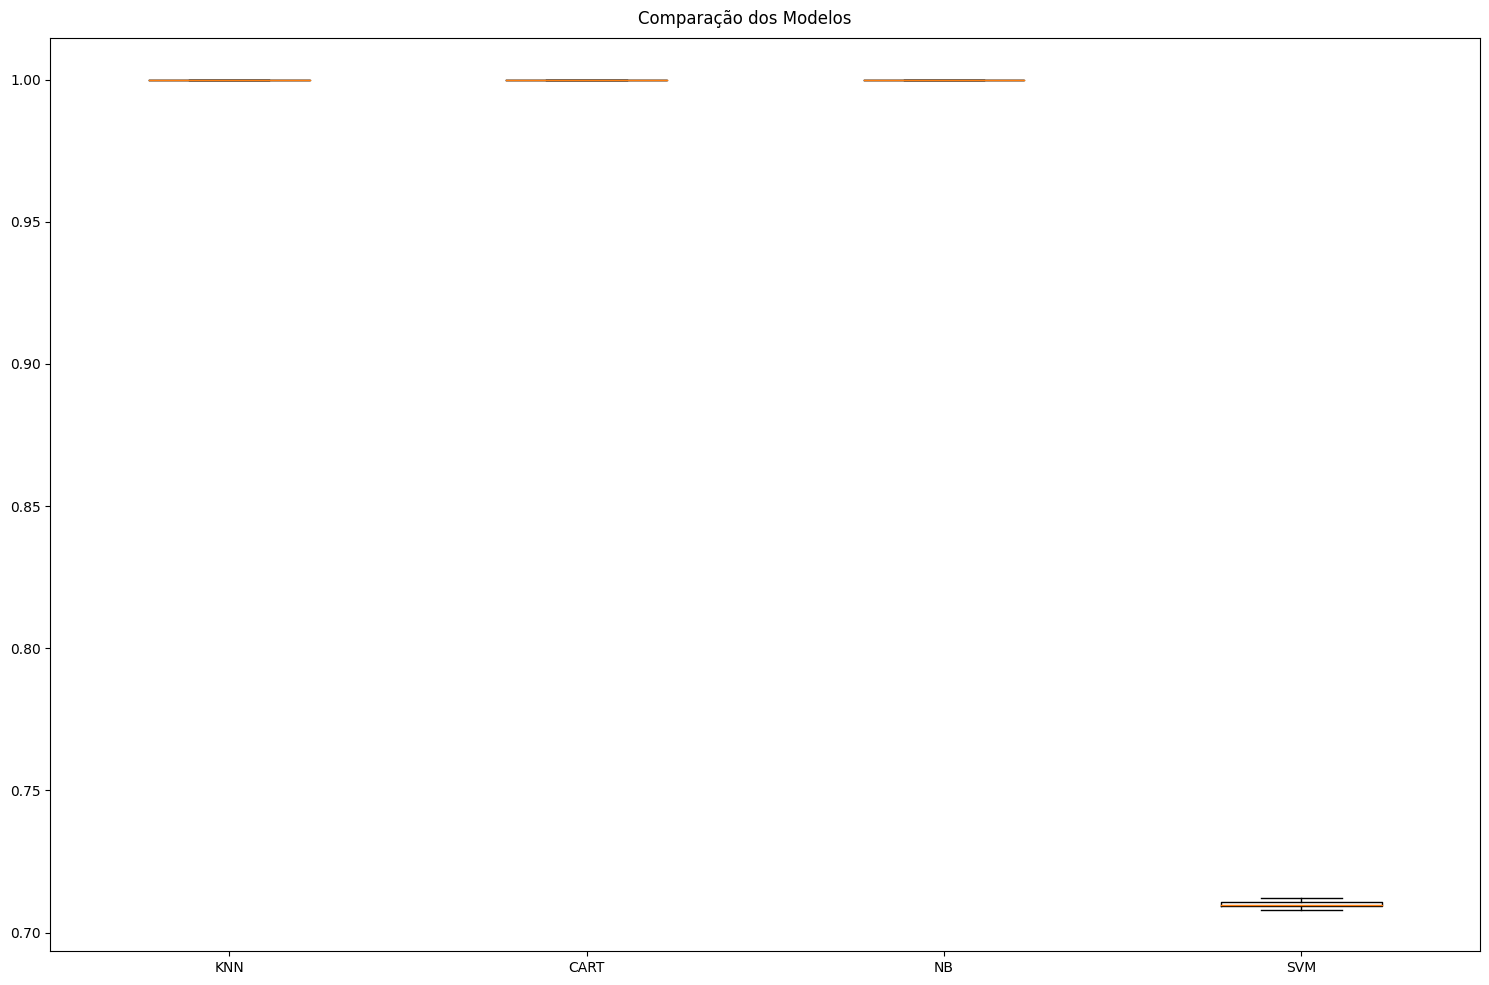

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_treino, y_treino, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

KNN-orig: 1.000 (0.000)
CART-orig: 1.000 (0.000)
NB-orig: 1.000 (0.000)
SVM-orig: 0.710 (0.001)
KNN-padr: 1.000 (0.000)
CART-padr: 1.000 (0.000)
NB-padr: 1.000 (0.000)
SVM-padr: 1.000 (0.000)
KNN-norm: 1.000 (0.000)
CART-norm: 1.000 (0.000)
NB-norm: 1.000 (0.000)
SVM-norm: 1.000 (0.000)


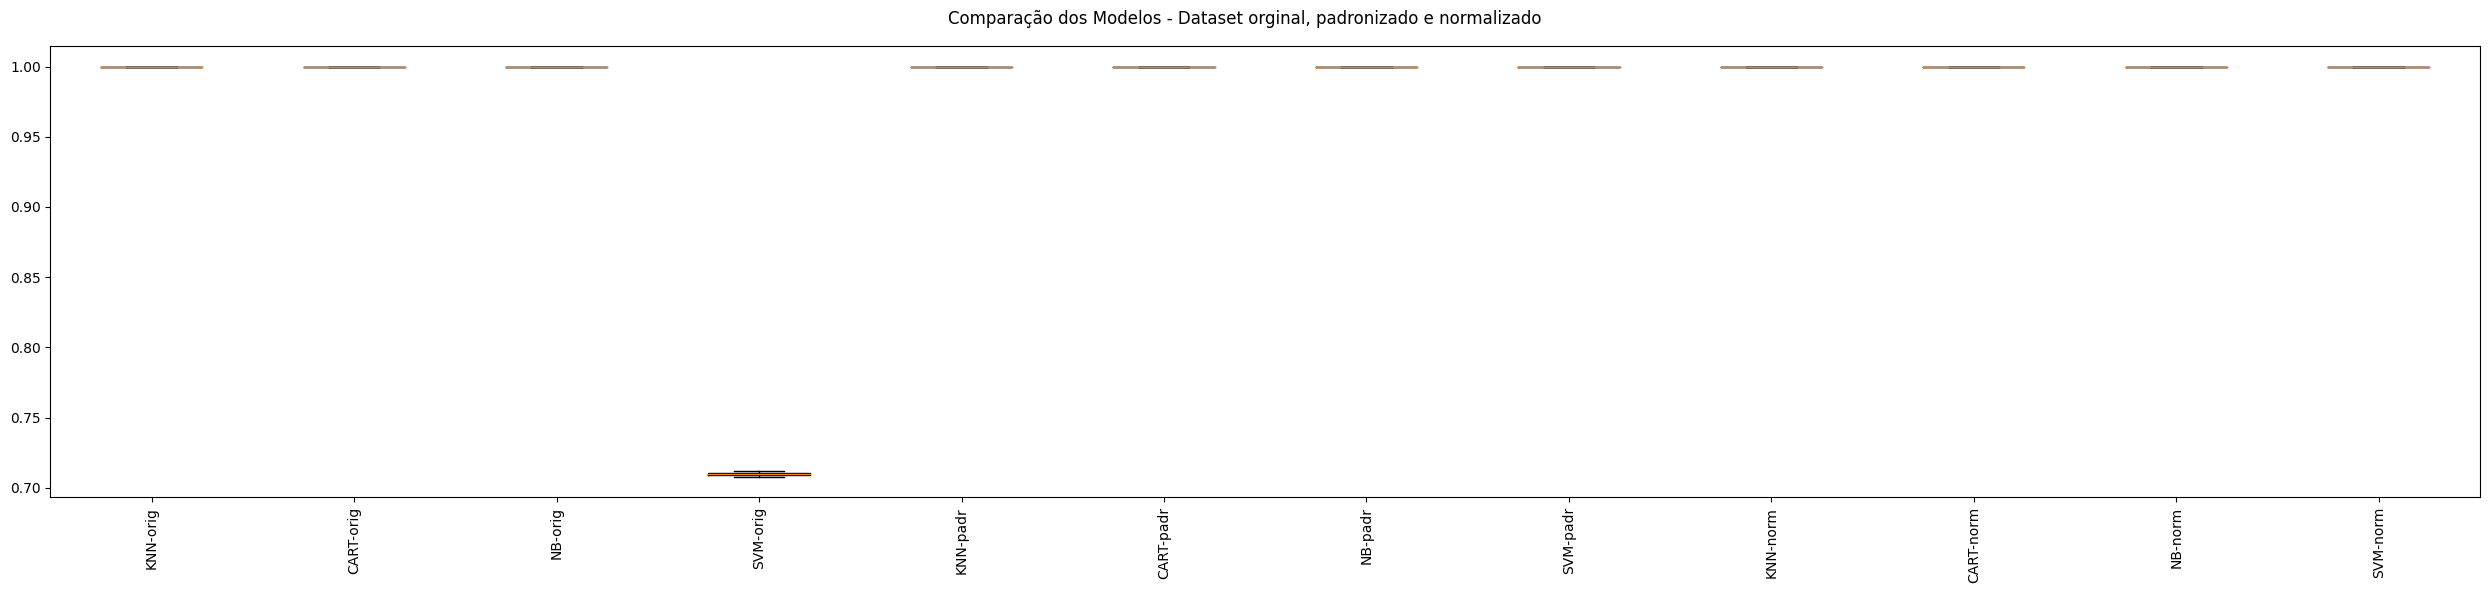

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_treino, y_treino, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

In [ ]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_treino, y_treino)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 1.000000 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}
Sem tratamento de missings: knn-padr - Melhor: 1.000000 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}
Sem tratamento de missings: knn-norm - Melhor: 1.000000 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}


In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_treino) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_treino) # aplicação da padronização no conjunto de treino
model = KNeighborsClassifier(metric='manhattan', n_neighbors=17)
model.fit(rescaledX, y_treino)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_teste) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_teste, predictions))

1.0


In [ ]:
# Vamos aplicar a normalização em treino e teste
# Padronização
sc = MinMaxScaler()
X_treino_normalizados = sc.fit_transform(X_treino)
X_teste_normalizados = sc.transform(X_teste)

In [ ]:
# Treina o modelo
modelo = LinearRegression(fit_intercept = True)

modelo = modelo.fit(X_treino_normalizados, y_treino)

In [ ]:
accuracy_score(y_teste, model.fit(X_treino_normalizados, y_treino).predict(X_teste_normalizados))

1.0

In [ ]:
UF = 5
IDADE = 25
ESCOLARIDADE = 0
ESTADO_CIVIL = 2
QT_FILHOS = 1
CASA_PROPRIA = 1
QT_IMOVEIS = 1
VL_IMOVEIS = 300000
OUTRA_RENDA = 1
OUTRA_RENDA_VALOR = 2000
TEMPO_ULTIMO_EMPREGO_MESES = 18
TRABALHANDO_ATUALMENTE = 1
ULTIMO_SALARIO = 5400.0
QT_CARROS = 4
VALOR_TABELA_CARROS = 70000
FAIXA_ETARIA = 2

novos_dados = [UF, IDADE, ESCOLARIDADE, ESTADO_CIVIL, QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,
               OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,
               VALOR_TABELA_CARROS, FAIXA_ETARIA]


# Reshape
X = np.array(novos_dados).reshape(1, -1)
X = sc.transform(X)

# Previsão
print("Score de crédito previsto para esse cliente:", model.predict(X))

Score de crédito previsto para esse cliente: [89]
